# Surprise Housing

Surprise Housing, a US firm, plans an Australian market entry using data-driven strategies for property flipping. They possess an Australian house sales dataset which they want to leverage to refine investment decisions by comprehending pricing dynamics in the new market.

We need to determine:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

## Loading Data

> From the data and data description, it is clear that values like 'None' are not to be considered as null values.

In [2]:
# Providing Null Values

df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
TAR_VAR = ['SalePrice']
NUM_VARS = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']
CAT_VARS = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']

## Cleaning Data

#### Dropping columns based on analysis

In [7]:
# Unique values greater than 80% in all columns
df_unique_p = df.nunique() / len(df) * 100
df_unique_p[df_unique_p > 80].index.tolist()

['Id']

> Removing Identifier column - 'Id'

In [8]:
df.drop(['Id'], axis=1, inplace=True)

#### Handling Missing Values

In [9]:
# Listing Columns which have missing values
df_null_per = df.isnull().mean() * 100
df_null_per[df_null_per > 0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

> Considering above missing value columns, analyzing the missing value cols with data description and deleting/transforming data accordingly.
> - LotFrontage : Replacing 'NA' with 0.
> - Alley : Removing the column as it has > 40% missing values.
> - MasVnrType : Removing the column as it has > 40% missing values.
> - MasVnrArea : Replacing 'NA' with 0.
> - BsmtQual : Replacing 'NA' with 'NoBasement'.
> - BsmtCond : Replacing 'NA' with 'NoBasement'.
> - BsmtExposure : Replacing 'NA' with 'NoBasement'.
> - BsmtFinType1 : Replacing 'NA' with 'NoBasement'.
> - BsmtFinType2 : Replacing 'NA' with 'NoBasement'.
> - Electrical : Only 1 'NA' value, replacing with Mode value.
> - FireplaceQu : Removing the column as it has > 40% missing values.
> - GarageType : Replacing 'NA' with 'NoGarage'.
> - GarageYrBlt : Replacing 'NA' with 0.
> - GarageFinish : Replacing 'NA' with 'NoGarage'.
> - GarageQual : Replacing 'NA' with 'NoGarage'.
> - GarageCond : Replacing 'NA' with 'NoGarage'.
> - PoolQC : Removing the column as it has > 40% missing values.
> - Fence : Removing the column as it has > 40% missing values.
> - MiscFeature : Removing the column as it has > 40% missing values.

In [10]:
df.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

df.LotFrontage.fillna(0, inplace=True)
df.MasVnrArea.fillna(0, inplace=True)
df.BsmtQual.fillna('NoBasement', inplace=True)
df.BsmtCond.fillna('NoBasement', inplace=True)
df.BsmtExposure.fillna('NoBasement', inplace=True)
df.BsmtFinType1.fillna('NoBasement', inplace=True)
df.BsmtFinType2.fillna('NoBasement', inplace=True)
df.Electrical.fillna(df.Electrical.mode()[0], inplace=True)
df.GarageType.fillna('NoGarage', inplace=True)
df.GarageYrBlt.fillna(df.GarageYrBlt.mode()[0], inplace=True)
df.GarageFinish.fillna('NoGarage', inplace=True)
df.GarageQual.fillna('NoGarage', inplace=True)
df.GarageCond.fillna('NoGarage', inplace=True)

In [11]:
df_null_count = df.isnull().sum()
df_null_count[df_null_count > 0]

Series([], dtype: int64)

> All the Missing Values have been handled.

In [12]:
TAR_VAR = ['SalePrice']
NUM_VARS = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']
CAT_VARS = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition']

## Performing EDA

#### Visualizing the numerical variables against Target Variable

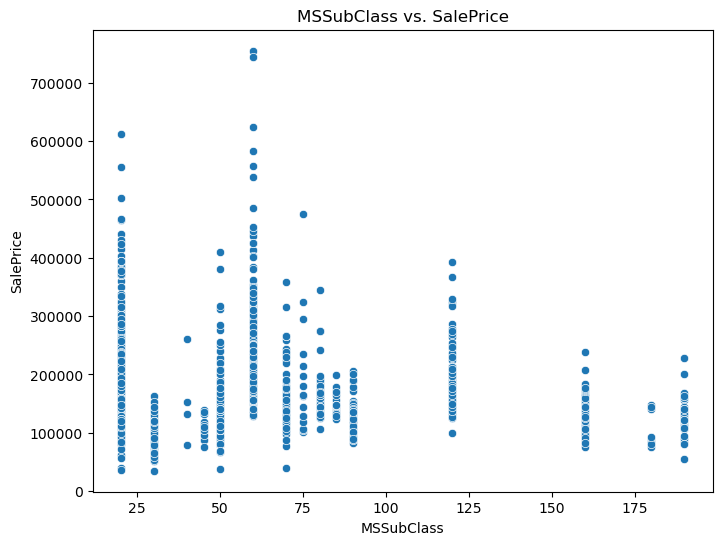

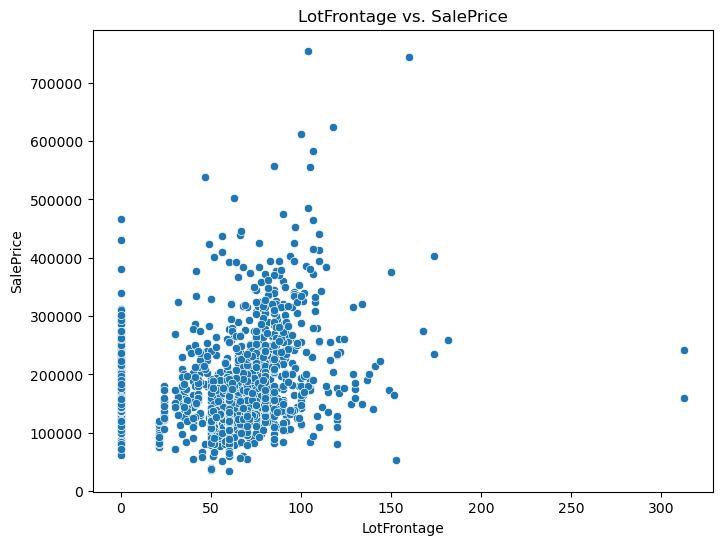

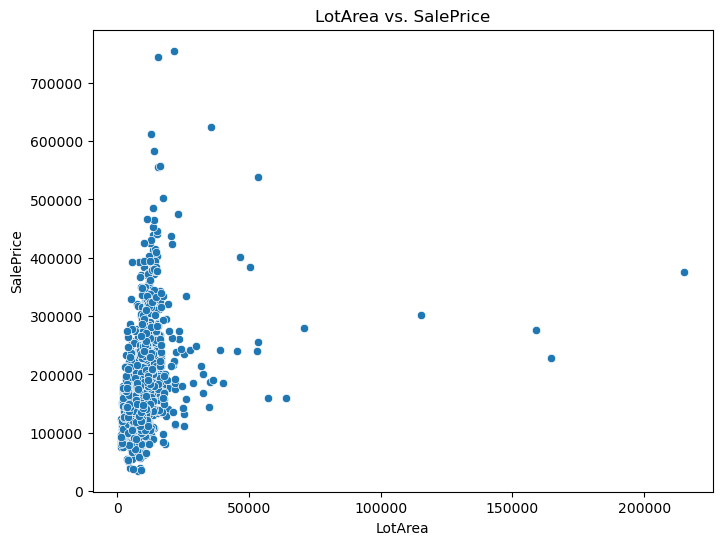

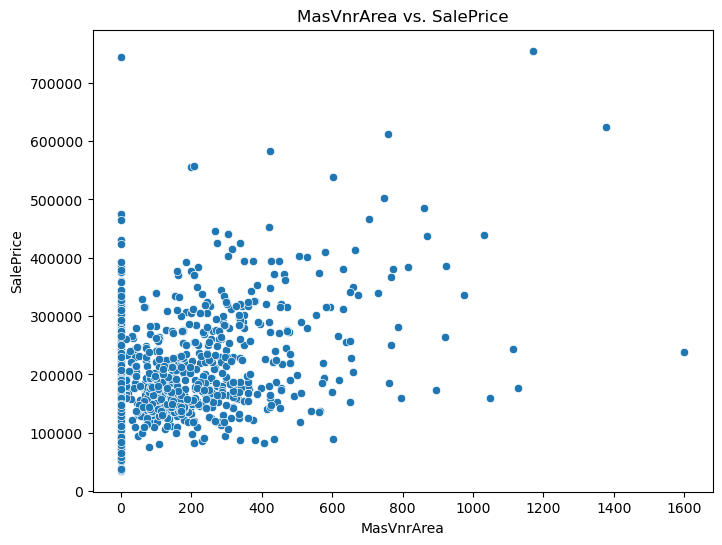

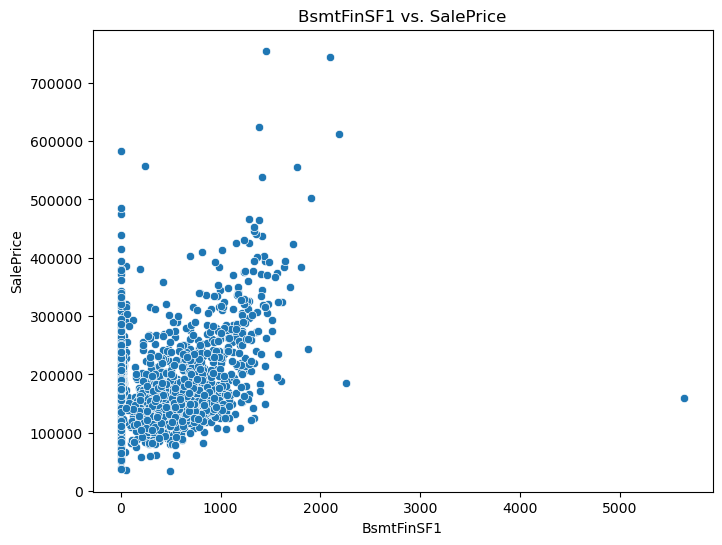

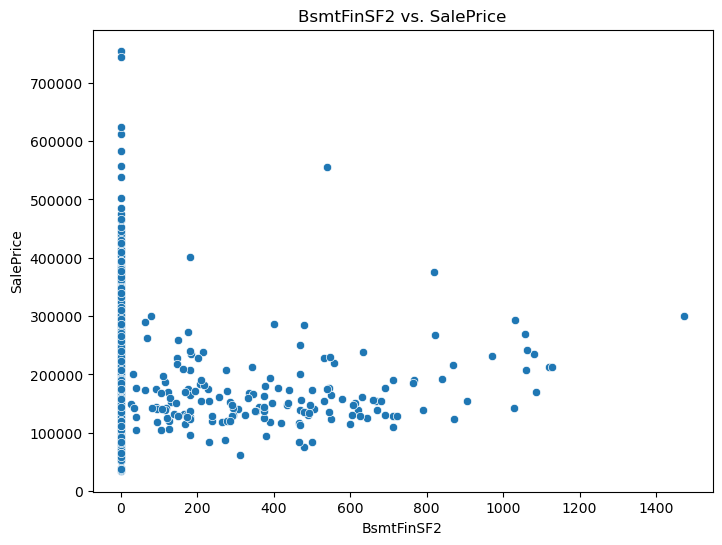

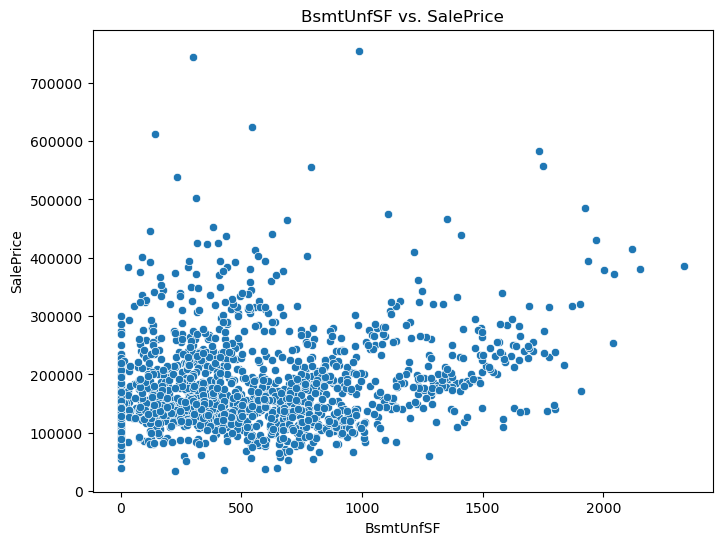

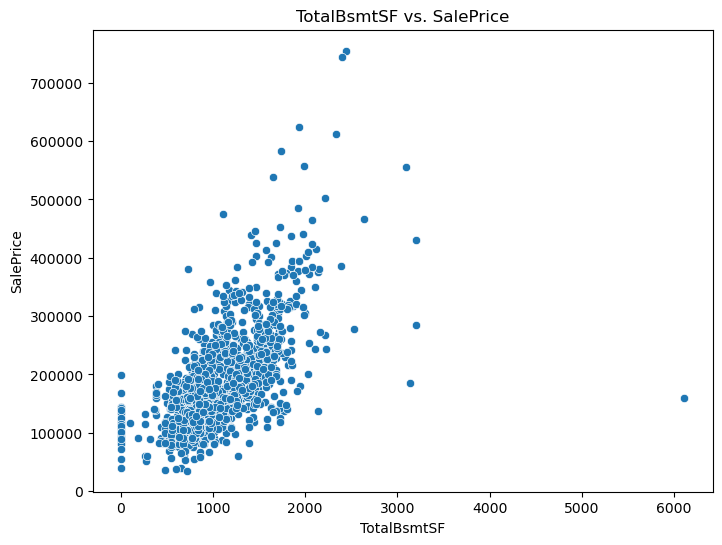

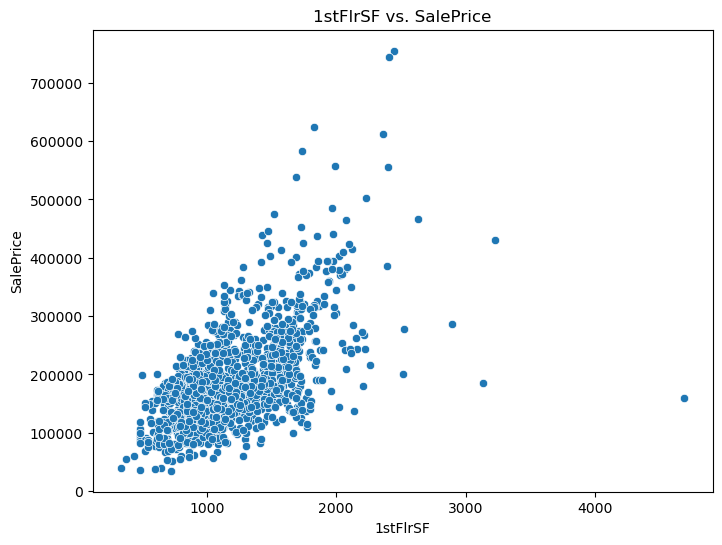

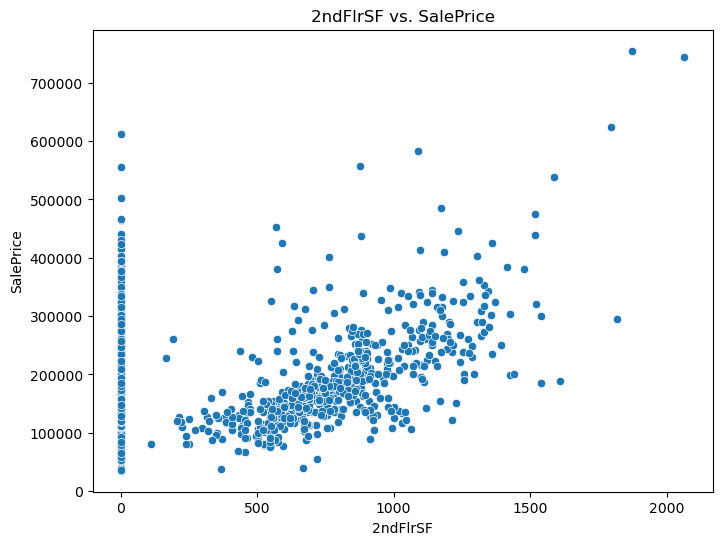

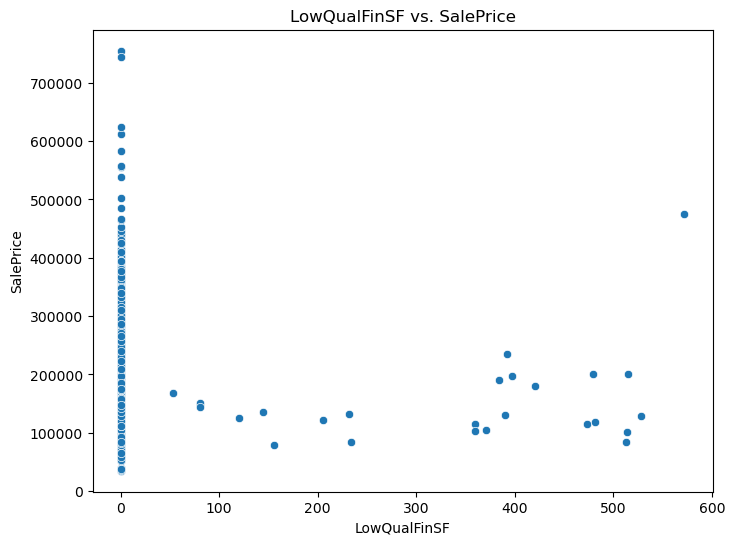

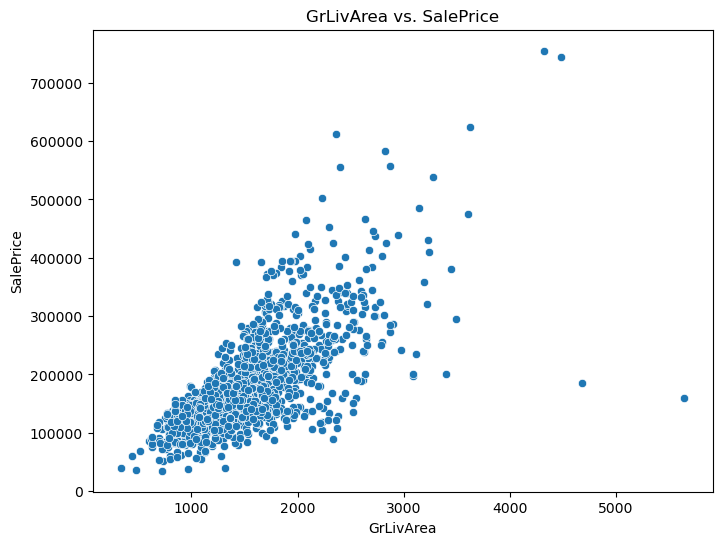

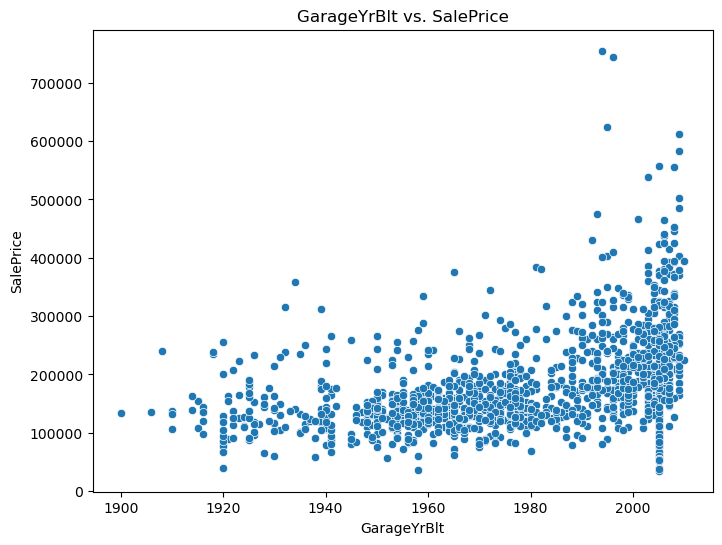

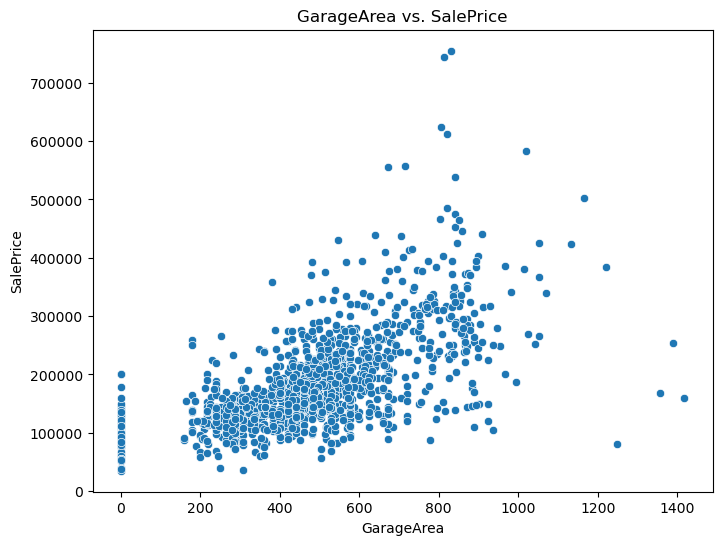

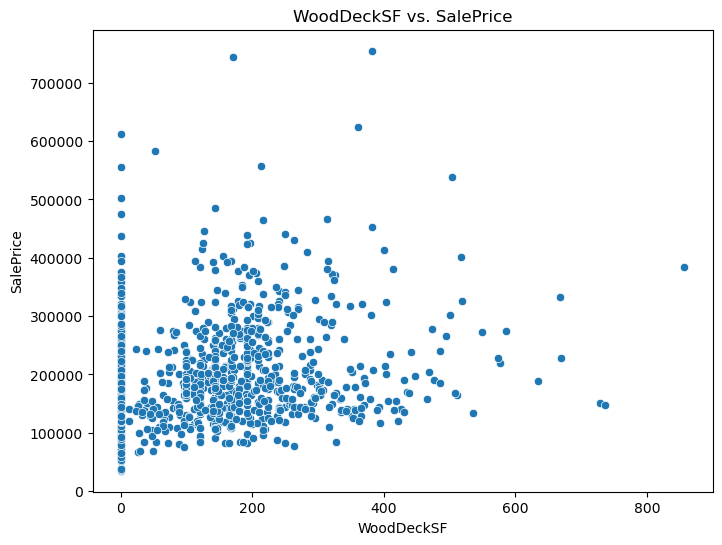

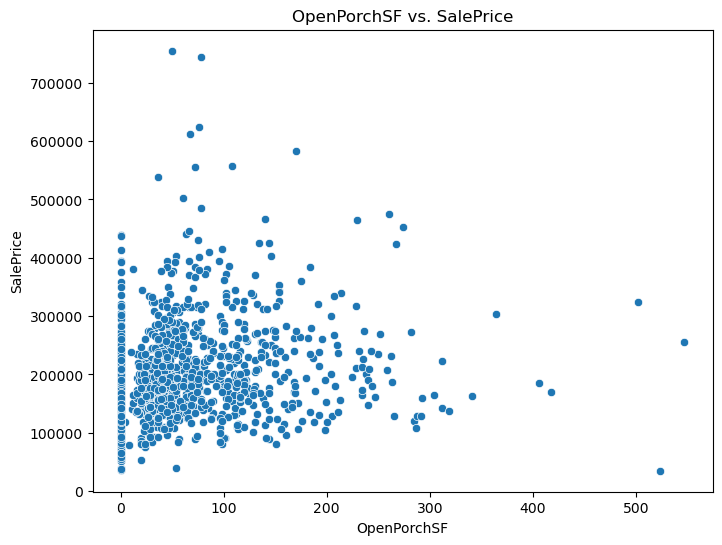

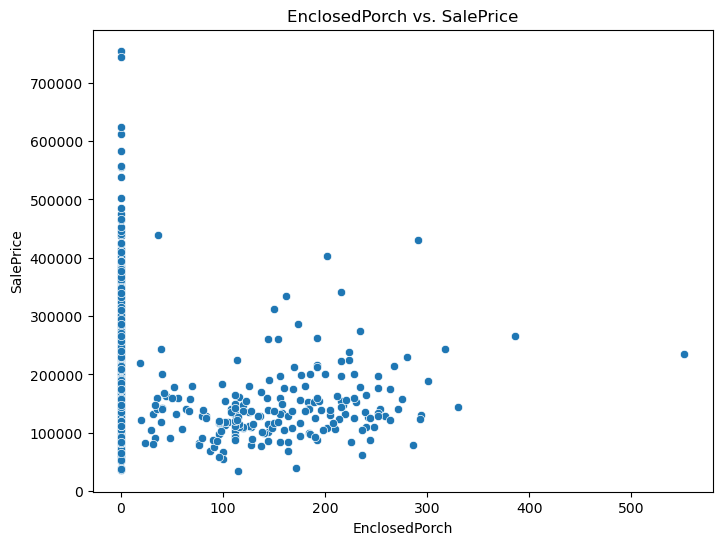

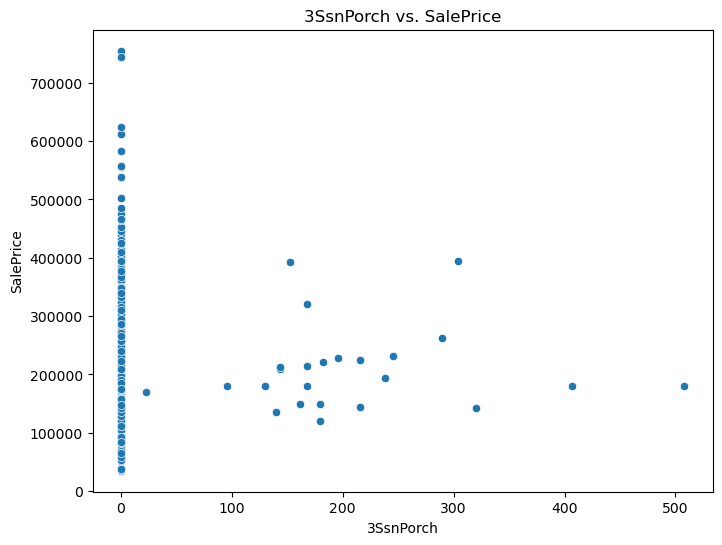

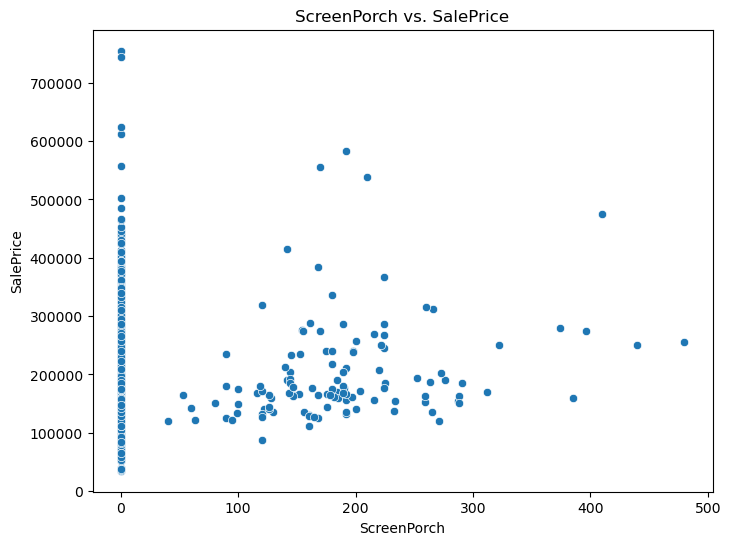

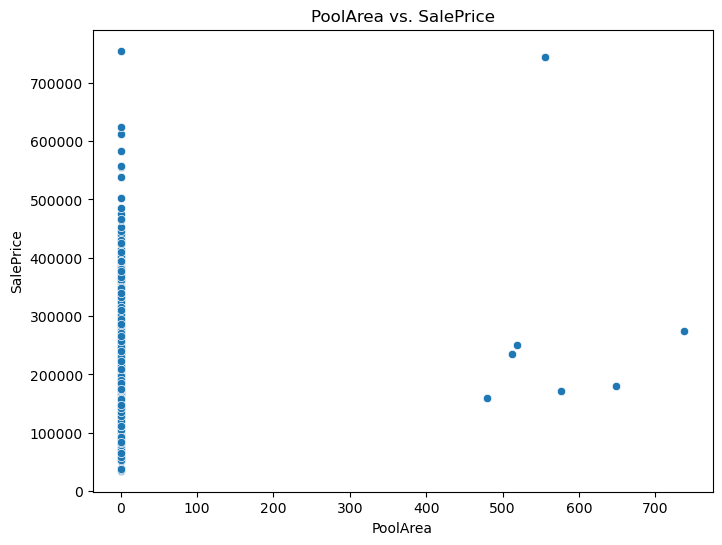

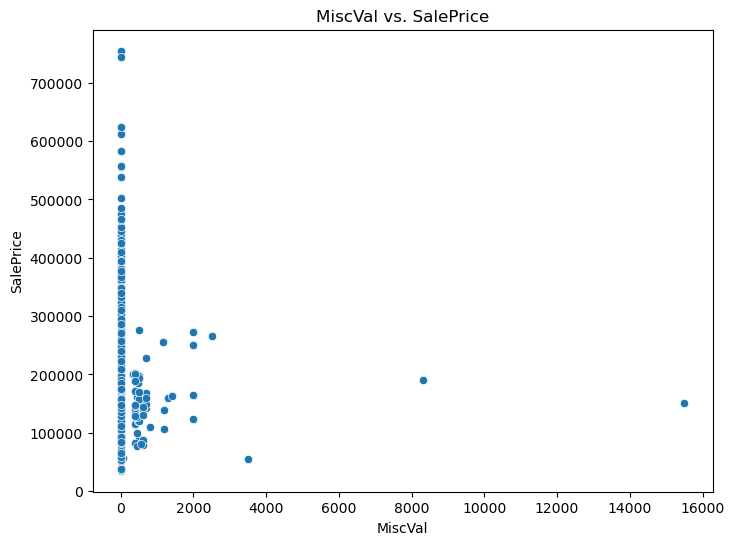

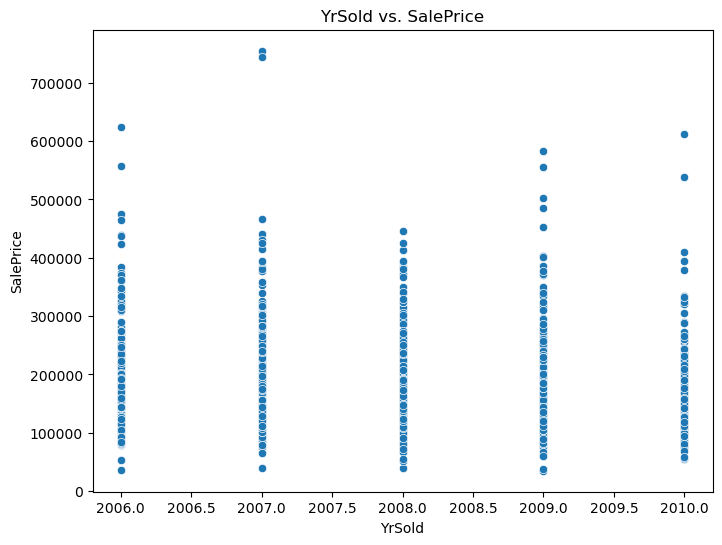

In [13]:
for num_var in NUM_VARS:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=num_var, y='SalePrice', data=df)
    plt.title(f"{num_var} vs. {'SalePrice'}")
    plt.xlabel(num_var)
    plt.ylabel('SalePrice')
    plt.show()


> From the above plots we can observe
> - Predictor Variables that don't show linear relationship - MSSubClass, LowQualFinSF, 3SsnPorch, PoolArea, MiscVal, YrSold
> - Predictor Variables that shows somewhat linear relationship - GarageYeBlt, WoodDeckSF, OpenPorchSF
> - Predictor Variables that shows linear relationship - LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea, EnclosedPorch, ScreenPorch

> Deleting Predictor Variables that don't show linear relationship

In [14]:
df.drop(['MSSubClass', 'LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal', 'YrSold'], axis=1, inplace=True)

NUM_VARS = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']

#### Handling Outliers of Numerical Variables

In [15]:
# Removing Outliers based on Z-Score values
z_score_threshold = 4

def remove_outliers_z_score(df, col):
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    return df[(z_scores < z_score_threshold) & (z_scores > -z_score_threshold)]

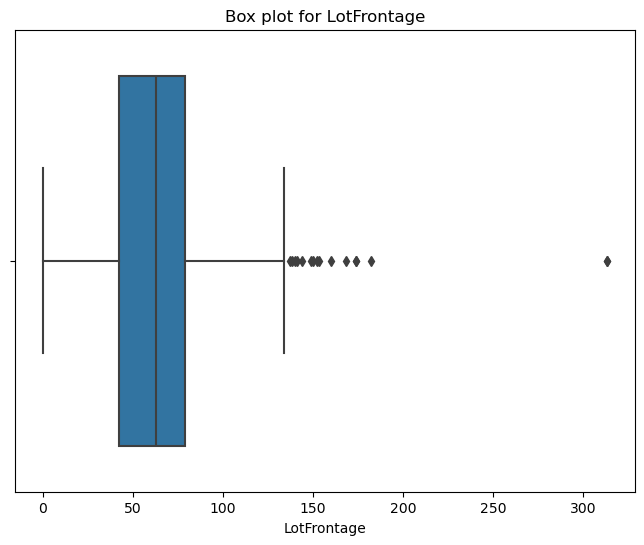

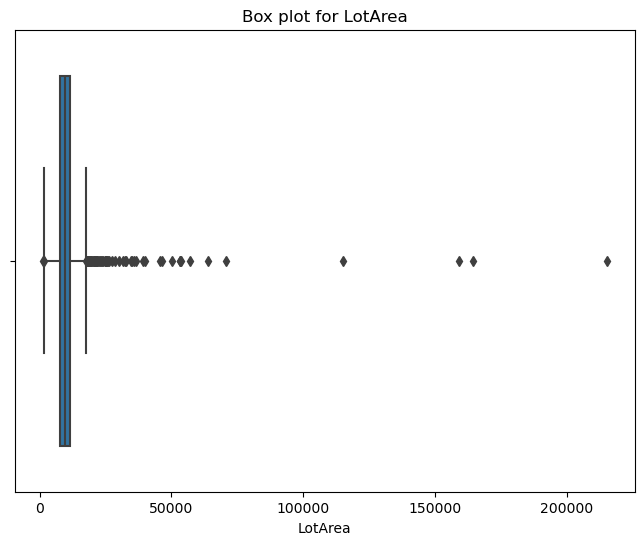

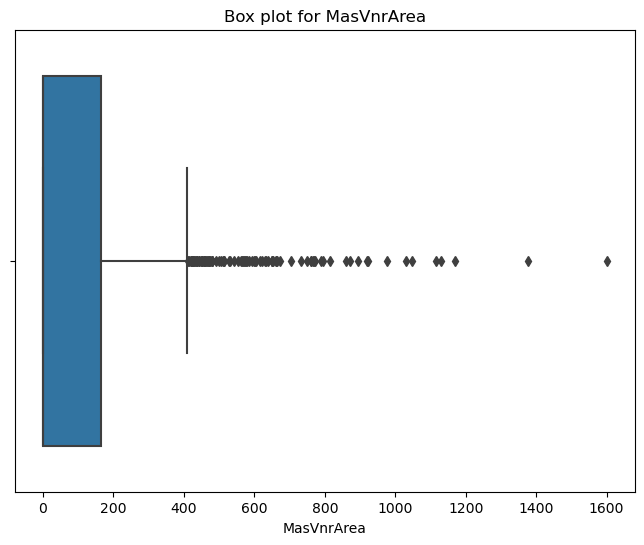

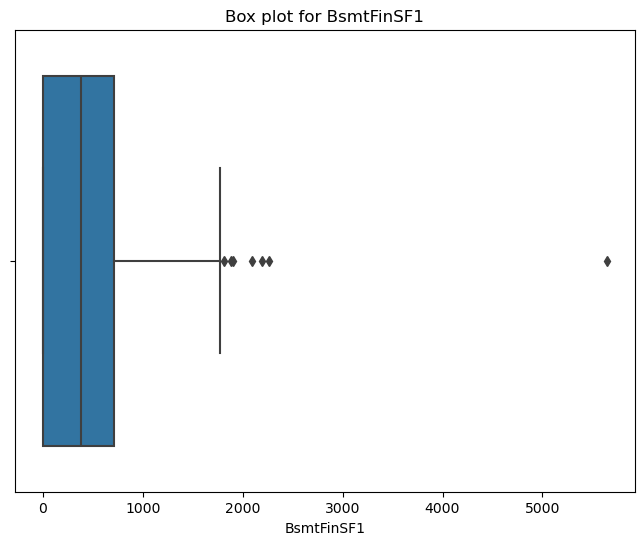

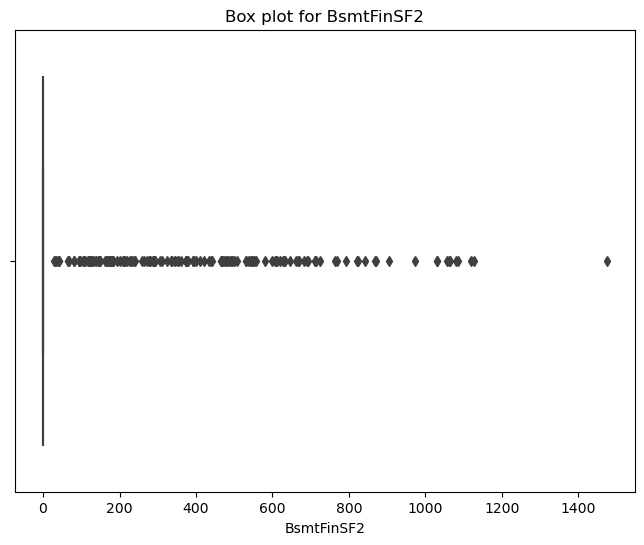

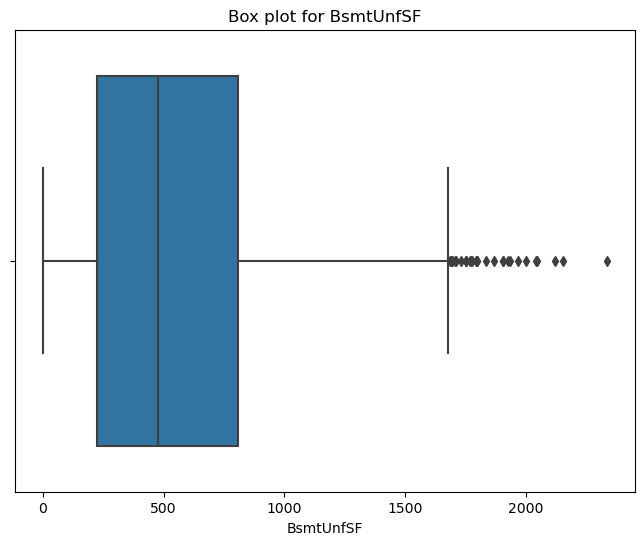

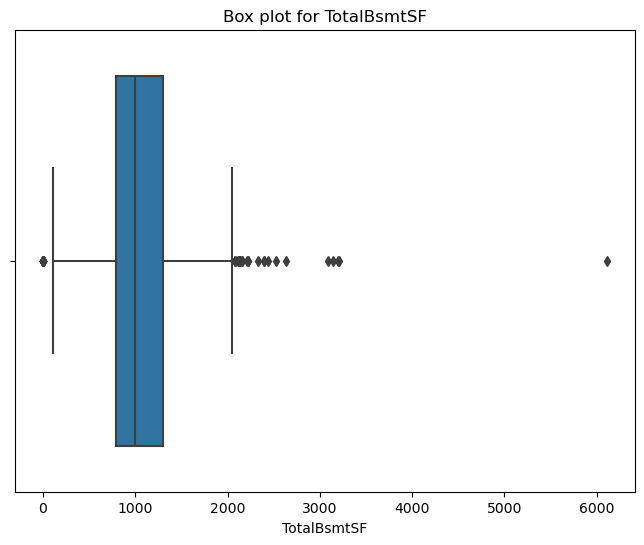

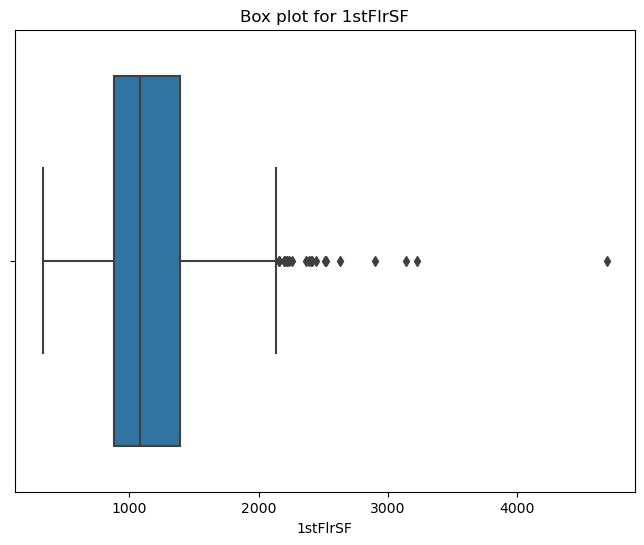

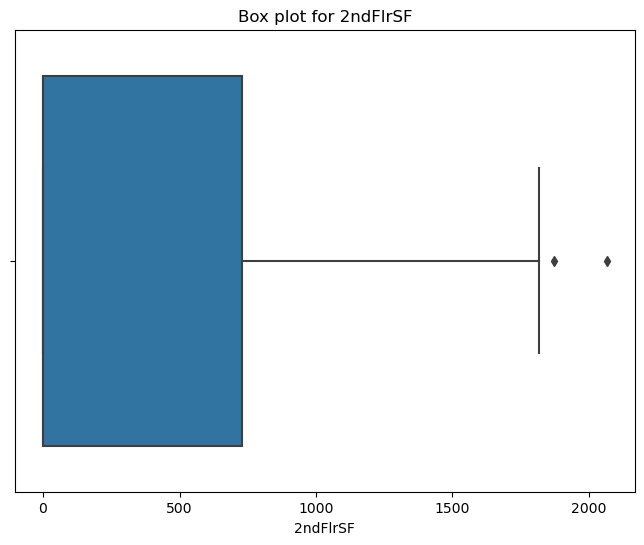

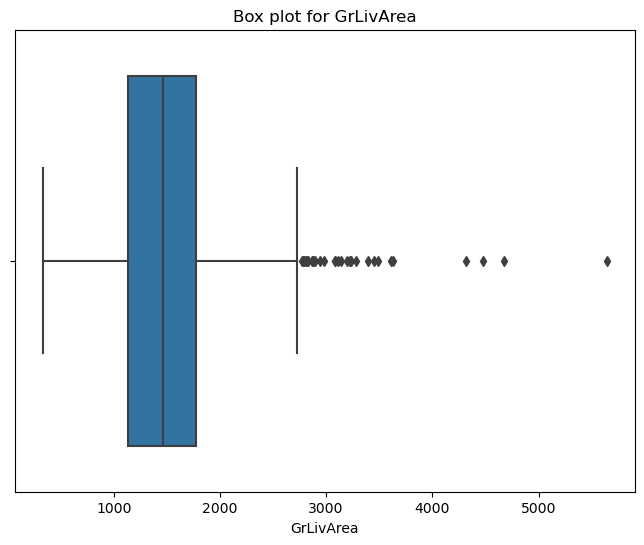

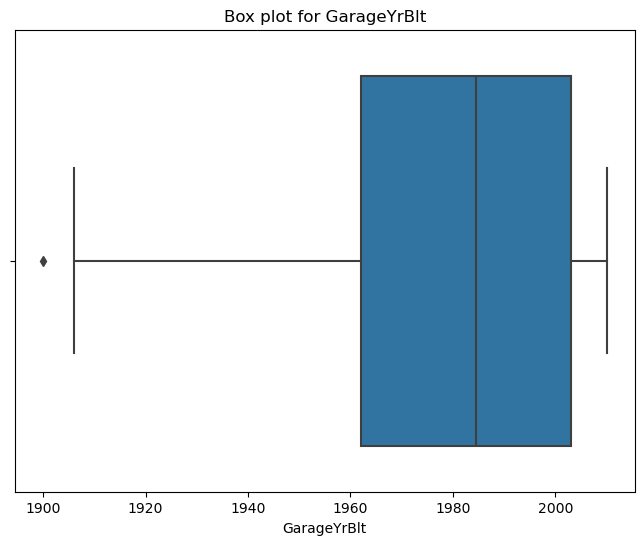

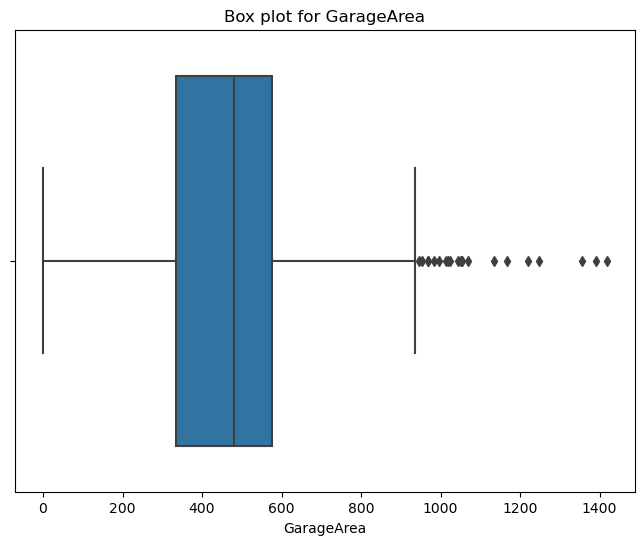

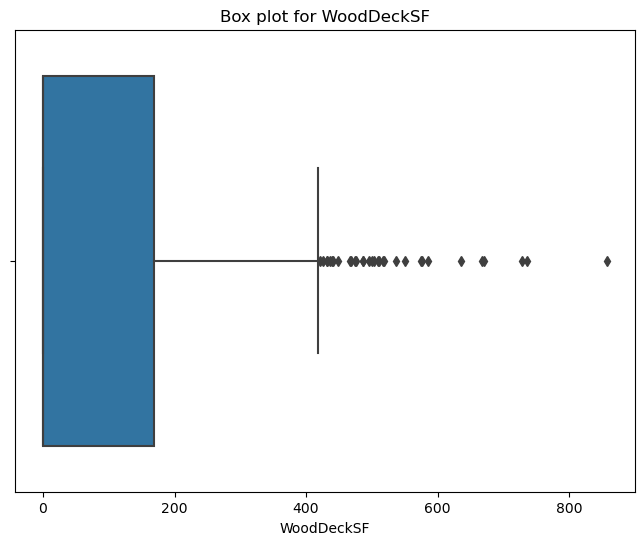

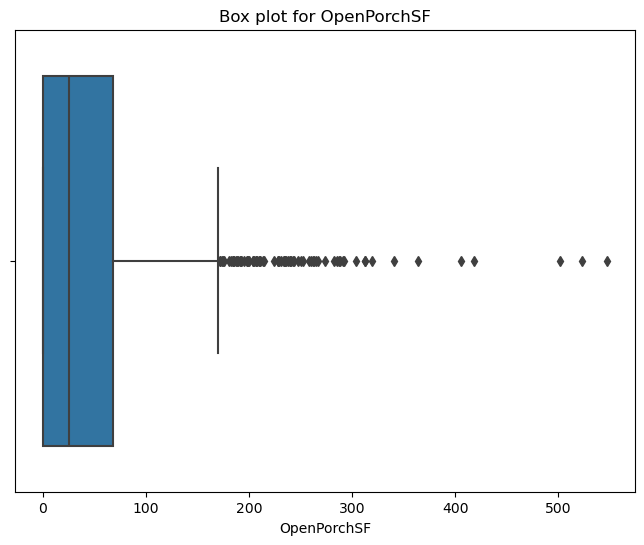

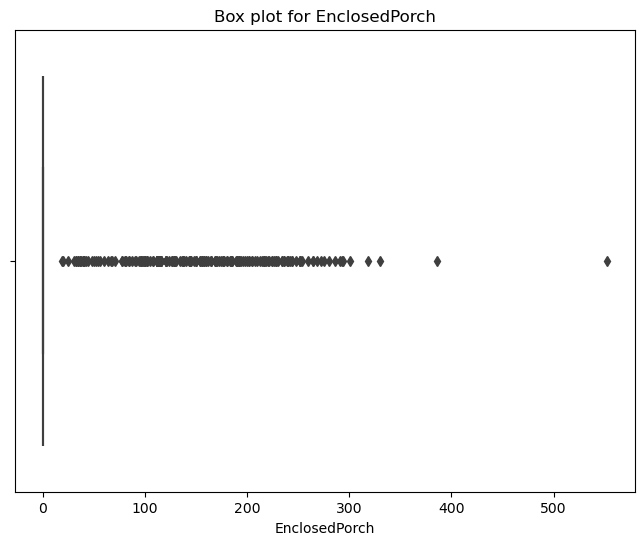

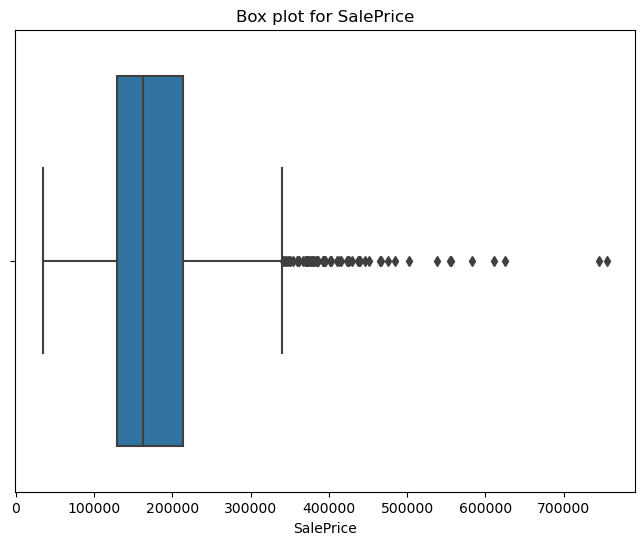

In [16]:
# Visualizing Outliers for each numerical variable using BoxPlot.
for var in NUM_VARS + TAR_VAR:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[var])
    plt.title(f"Box plot for {var}")
    plt.xlabel(var)
    plt.show()

In [17]:
# Removing Outliers based on Z-Score values
for col in NUM_VARS + TAR_VAR:
    df = remove_outliers_z_score(df, 'SalePrice')

# Reset index after removal
df.reset_index(drop=True, inplace=True)


In [18]:
df.shape

(1447, 68)

#### Multicolinearity Check

In [19]:
df[NUM_VARS + TAR_VAR].corr()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
LotFrontage,1.000000,0.095691,0.093465,0.063838,-0.010054,0.158753,0.226436,0.233835,0.024281,0.200463,0.030413,0.191522,-0.020023,0.062559,0.030833,0.183754
LotArea,0.095691,1.000000,0.079979,0.205987,0.114125,-0.004172,0.254673,0.294328,0.031197,0.247073,-0.050214,0.169475,0.160229,0.081098,-0.015339,0.252508
MasVnrArea,0.093465,0.079979,1.000000,0.239771,-0.070302,0.105088,0.332692,0.310035,0.149508,0.353969,0.201222,0.354990,0.142237,0.121752,-0.107896,0.432004
BsmtFinSF1,0.063838,0.205987,0.239771,1.000000,-0.054228,-0.506411,0.505813,0.425984,-0.156414,0.180599,0.109365,0.283329,0.199616,0.109952,-0.099727,0.361396
BsmtFinSF2,-0.010054,0.114125,-0.070302,-0.054228,1.000000,-0.211481,0.104083,0.099347,-0.096574,-0.006242,-0.095150,-0.016168,0.072368,0.004717,0.036592,-0.011022
BsmtUnfSF,0.158753,-0.004172,0.105088,-0.506411,-0.211481,1.000000,0.418589,0.315850,-0.005854,0.233887,0.167940,0.176530,-0.009238,0.120552,-0.000012,0.211665
TotalBsmtSF,0.226436,0.254673,0.332692,0.505813,0.104083,0.418589,1.000000,0.808858,-0.206422,0.427505,0.251368,0.472330,0.226981,0.241019,-0.090624,0.592209
1stFlrSF,0.233835,0.294328,0.310035,0.425984,0.099347,0.315850,0.808858,1.000000,-0.238124,0.545126,0.167663,0.473695,0.229655,0.201778,-0.059284,0.582114
2ndFlrSF,0.024281,0.031197,0.149508,-0.156414,-0.096574,-0.005854,-0.206422,-0.238124,1.000000,0.679453,0.045340,0.123344,0.076938,0.205521,0.067811,0.291430
GrLivArea,0.200463,0.247073,0.353969,0.180599,-0.006242,0.233887,0.427505,0.545126,0.679453,1.000000,0.164913,0.452892,0.236185,0.326230,0.019610,0.680056


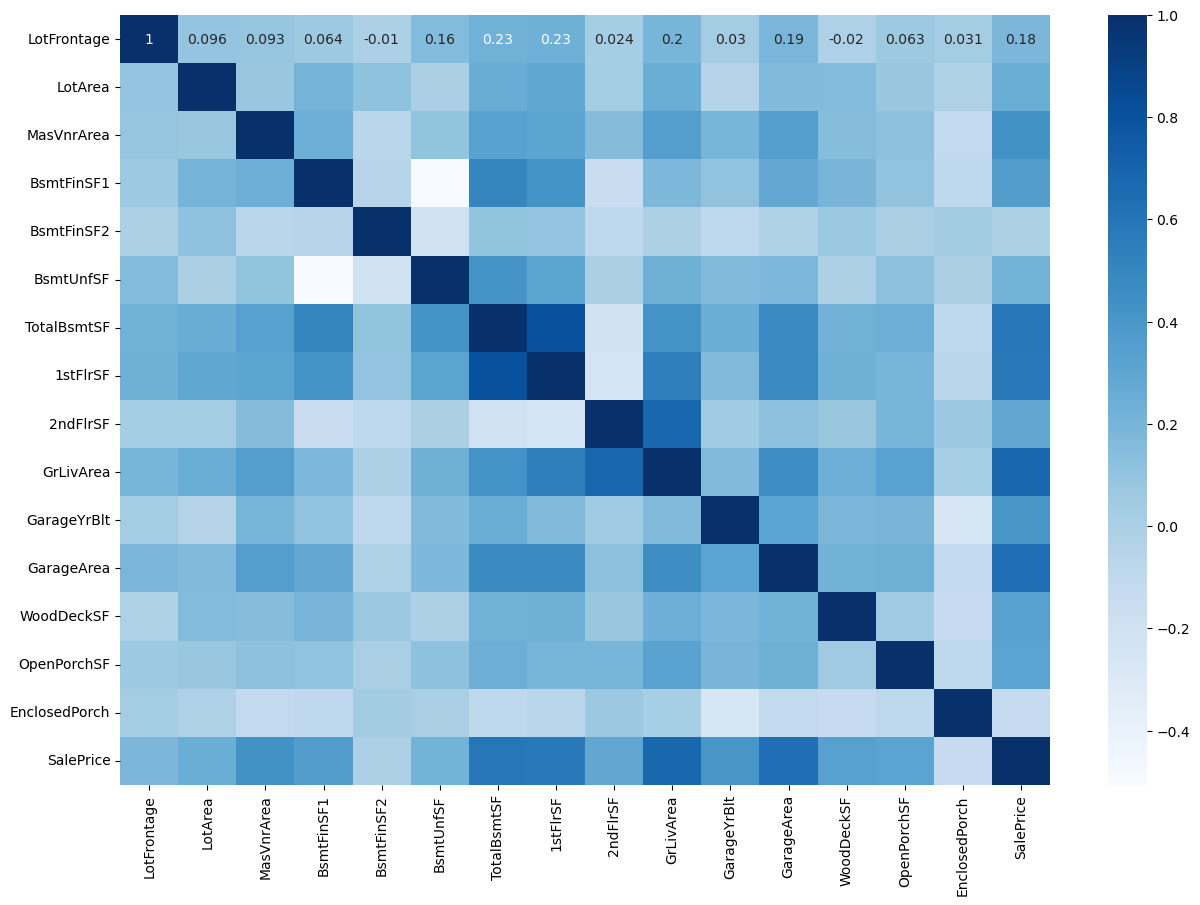

In [20]:
plt.figure(figsize = (15, 10))
sns.heatmap(df[NUM_VARS + TAR_VAR].corr(), annot = True, cmap="Blues")
plt.show()

> We observe high correlation between '1stFlrSF' and 'TotalBsmtSF' variables. This is a case of Multicolinearity, so dropping 'TotalBsmtSF' column to mitigate multicollinearity.

In [21]:
def get_vifs():
    df_num = df[NUM_VARS + TAR_VAR]
    df_num_with_const = add_constant(df_num)
    vifs = [variance_inflation_factor(df_num_with_const.values, i) for i in range(df_num_with_const.shape[1])]
    return [(i, j) for i, j in zip(df_num.columns, vifs)]

In [22]:
df.drop(['TotalBsmtSF'], axis=1, inplace=True)

NUM_VARS = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']

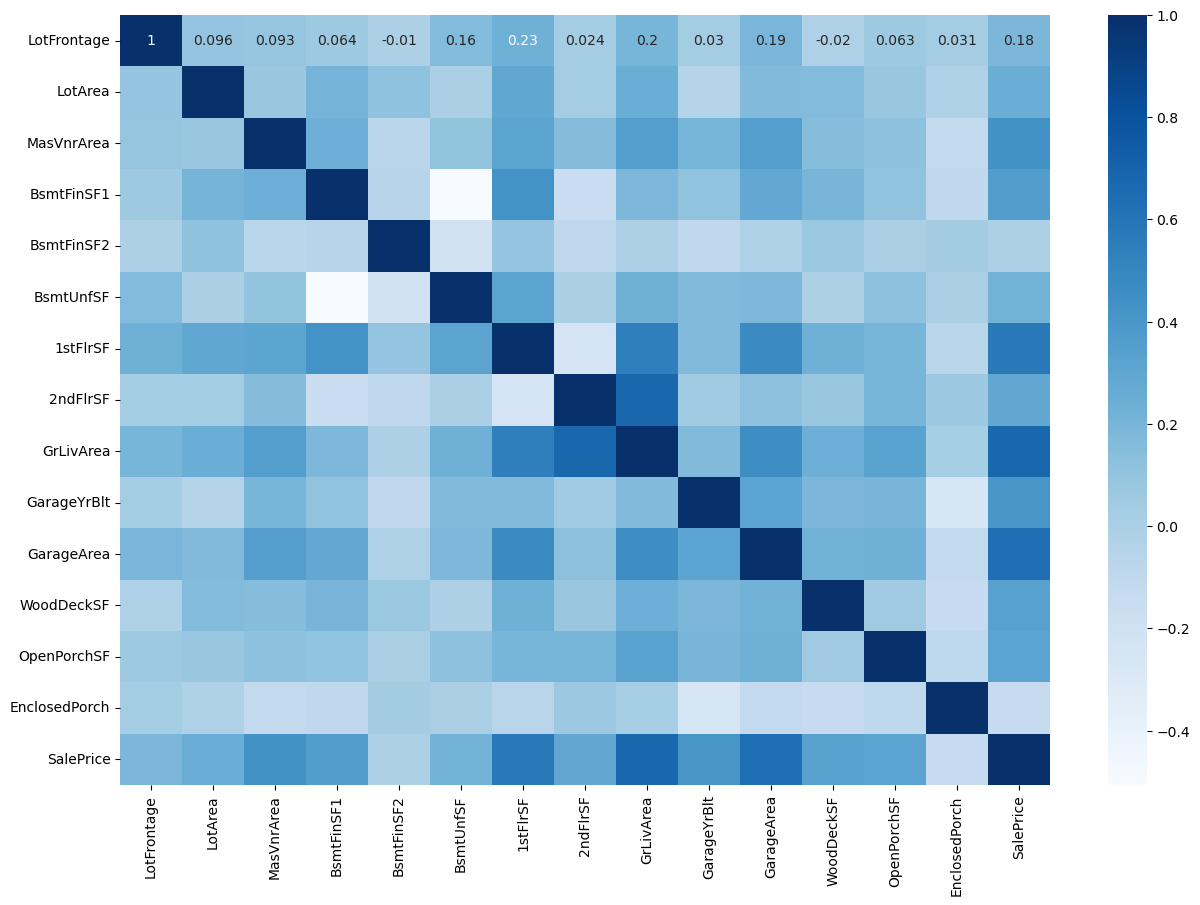

In [23]:
plt.figure(figsize = (15, 10))
sns.heatmap(df[NUM_VARS + TAR_VAR].corr(), annot = True, cmap="Blues")
plt.show()

> We observe high correlation between '2ndFlrSF' and 'GrLivArea' variables, so dropping 'GrLivArea' column to mitigate multicollinearity.

In [24]:
df.drop(['GrLivArea'], axis=1, inplace=True)

NUM_VARS = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']

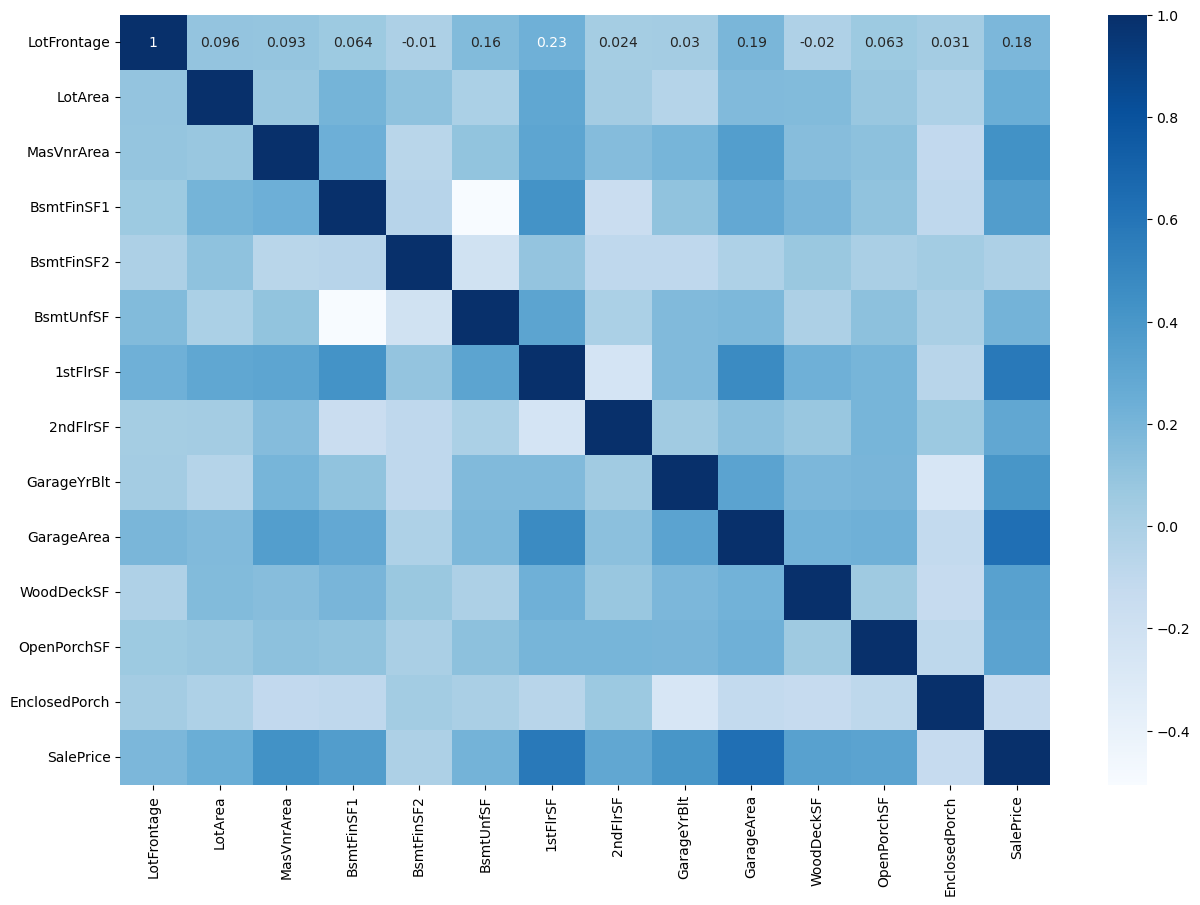

In [25]:
plt.figure(figsize = (15, 10))
sns.heatmap(df[NUM_VARS + TAR_VAR].corr(), annot = True, cmap="Blues")
plt.show()

> Correlation between variables seems to be normal.

#### Visualizing the categorical variables against Target Variable

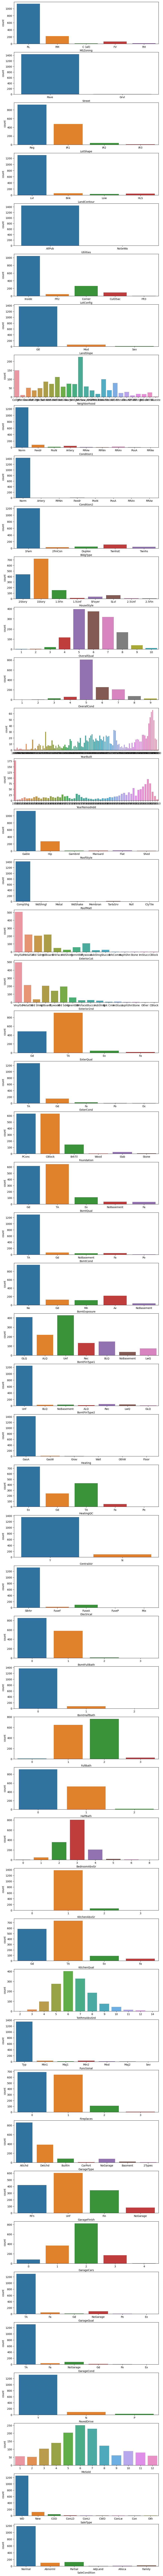

In [26]:
plt.figure(figsize=(10, 200))
for i, c in enumerate(CAT_VARS):
    plt.subplot(57, 1, i + 1)
    # sns.boxplot(x=c, y='SalePrice', data=df)
    sns.countplot(x=c, data=df)
plt.show()

> From the above plots we can observe all the attributes which highly contribute to the increase in Sales price as well as we observe some features having highly skewed data.

> Removing Highly Biased columns with bias ratio > 100

In [27]:
for c in CAT_VARS:
    value_counts = df[c].value_counts()
    bias_ratio = value_counts.iloc[0] / value_counts.iloc[1]
    if bias_ratio > 100:
        print(c, bias_ratio)

Street 240.16666666666666
Utilities 1446.0
Condition2 238.66666666666666
RoofMatl 129.36363636363637


In [28]:
high_bias_cols = ['Street', 'Utilities', 'Condition2', 'RoofMatl']
df.drop(high_bias_cols, axis=1, inplace=True)

CAT_VARS = [x for x in CAT_VARS if x not in high_bias_cols]

In [29]:
df.shape

(1447, 62)

C:\Users\agraw\AppData\Local\Temp\ipykernel_23536\2612454657.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.SalePrice)
C:\Users\agraw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


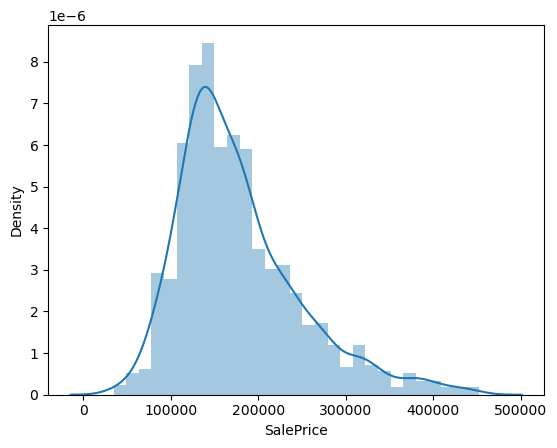

In [30]:
sns.distplot(df.SalePrice)
plt.show()

> We observe that SalePrice is not normally distributed, so we need to regularize with log for normal distribution.

In [31]:
df['SalePrice'] = np.log1p(df.SalePrice)

C:\Users\agraw\AppData\Local\Temp\ipykernel_23536\2612454657.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.SalePrice)
C:\Users\agraw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


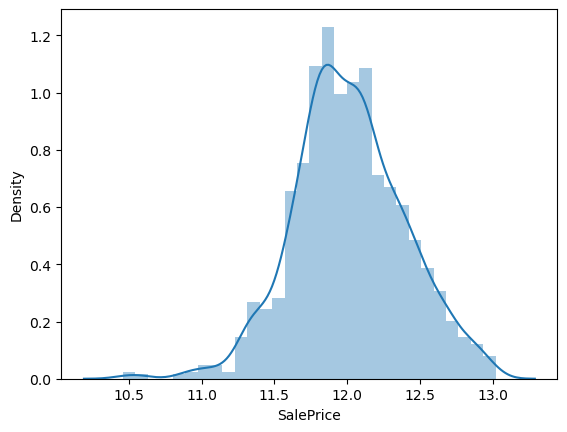

In [32]:
sns.distplot(df.SalePrice)
plt.show()

## Data Preparation for Regression Model

#### Encoding all Categorical Variables using One-Hot Encoding

In [33]:
# one_hot_encoding
for col in CAT_VARS:
    df[col] = df[col].astype(str)
    df_encoded = pd.get_dummies(df[col], drop_first=True, prefix=col, dtype=int)
    df = pd.concat([df, df_encoded], axis=1)
    df.drop(col, axis=1, inplace=True)

In [34]:
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,GarageYrBlt,GarageArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,854,2003.0,548,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,0,1976.0,460,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,866,2001.0,608,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,961,756,1998.0,642,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1053,2000.0,836,...,0,0,0,0,1,0,0,0,1,0


#### Train Test Split

In [35]:
y = df.pop('SalePrice')
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Standard Scaling

In [36]:
scaler = MinMaxScaler()
X_train[NUM_VARS] = scaler.fit_transform(X_train[NUM_VARS])
X_test[NUM_VARS] = scaler.transform(X_test[NUM_VARS])

## Model Building and Evaluation

#### Ridge Model

In [37]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [38]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022124,0.006230,0.008629,0.005223,0.0001,{'alpha': 0.0001},-0.111038,-0.138575,-0.137364,-0.129493,...,-0.128311,0.009975,26,-0.047960,-0.054452,-0.054372,-0.052392,-0.054642,-0.052764,0.002537
1,0.016076,0.006167,0.010655,0.006827,0.001,{'alpha': 0.001},-0.110695,-0.138374,-0.137179,-0.129097,...,-0.127945,0.010056,25,-0.047981,-0.054456,-0.054372,-0.052396,-0.054658,-0.052773,0.002532
2,0.018769,0.006253,0.006306,0.007724,0.01,{'alpha': 0.01},-0.109195,-0.136432,-0.135462,-0.126522,...,-0.125420,0.010215,24,-0.048127,-0.054496,-0.054390,-0.052502,-0.054828,-0.052868,0.002507
3,0.018795,0.006353,0.008491,0.007391,0.05,{'alpha': 0.05},-0.107240,-0.129913,-0.130232,-0.122407,...,-0.120277,0.009401,22,-0.048650,-0.054656,-0.054554,-0.052815,-0.055379,-0.053211,0.002431
4,0.015455,0.000476,0.006317,0.007740,0.1,{'alpha': 0.1},-0.106179,-0.124332,-0.126277,-0.118928,...,-0.116909,0.008091,21,-0.049294,-0.055007,-0.054904,-0.053315,-0.055920,-0.053688,0.002352


In [39]:
optimum_alpha = model_cv.best_params_
optimum_alpha

{'alpha': 5.0}

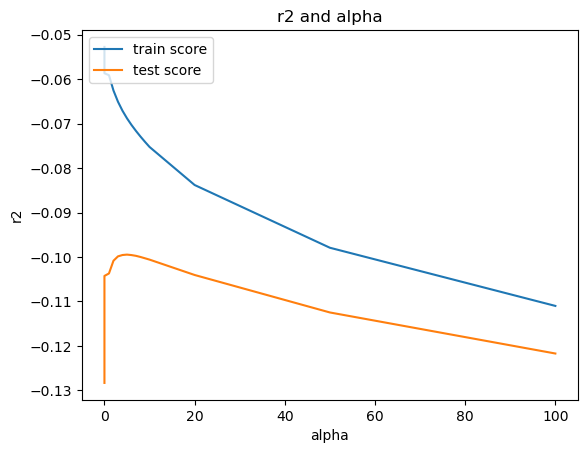

In [40]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [41]:
ridge = Ridge(alpha=optimum_alpha['alpha'])

ridge.fit(X_train, y_train)
ridge.coef_

array([ 3.57175950e-03,  7.59591427e-02,  2.57707035e-02,  1.82437112e-01,
        5.42319558e-02,  1.19105991e-01,  3.00729440e-01,  1.61356245e-01,
       -2.89729703e-03,  1.19950216e-01,  9.78966901e-02,  3.79306695e-02,
        3.48849519e-02,  2.74594851e-04,  1.02653209e-01,  6.12294563e-02,
        9.99160768e-02,  6.58544673e-02,  3.27733445e-02,  4.03224946e-02,
       -3.35475350e-04,  3.24617423e-02,  1.62020252e-02,  2.09384673e-02,
        1.65473722e-02, -3.99576607e-02, -1.13794804e-02, -3.02317690e-02,
        7.13746282e-03, -1.94901059e-02, -1.55271157e-02, -4.06009749e-02,
        4.93017005e-03,  8.42984244e-02,  4.02524451e-03,  1.05312490e-01,
       -5.51255859e-02, -2.36120229e-02, -7.51370428e-02, -9.70420944e-02,
       -1.26923480e-02, -2.31650975e-02, -6.32467784e-03, -3.01492087e-03,
        4.95982515e-02,  9.49208361e-02, -6.65871652e-02, -1.60077909e-02,
       -3.01162071e-02,  2.37777249e-02,  4.75647137e-02,  8.09756074e-02,
       -1.71444550e-02,  

In [42]:
print("Ridge Train Score", ridge.score(X_train,y_train))
print("Ridge Test Score", ridge.score(X_test,y_test))

Ridge Train Score 0.9342008723523131
Ridge Test Score 0.8453589166010134


In [43]:
# Ridge model coefficients
model_params_df = pd.DataFrame([])
model_params_df['columns'] = list(df.columns)
model_params_df['coef'] = ridge.coef_

model_params_df = model_params_df.sort_values(by='coef', ascending=False)
print('Ridge Intercept:', ridge.intercept_)
model_params_df.head(10)

Ridge Intercept: 11.447554244415366


,columns,coef
6,1stFlrSF,0.300729
3,BsmtFinSF1,0.182437
81,OverallQual_9,0.166400
7,2ndFlrSF,0.161356
80,OverallQual_8,0.131749
346,BsmtFullBath_2,0.130201
9,GarageArea,0.119950
5,BsmtUnfSF,0.119106
35,Neighborhood_Crawfor,0.105312
14,MSZoning_FV,0.102653


#### Lasso Model

In [44]:
params = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 10, 20]}
lasso = Lasso()

# GridSearch Cross Validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)
optimum_alpha = model_cv.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\agraw\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.256e+00, tolerance: 1.262e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\agraw\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.549e+00, tolerance: 1.274e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\agraw\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.007e+00, toleranc

In [45]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.218494,0.029939,0.008245,0.004983,0.000001,{'alpha': 1e-06},0.727879,0.715706,0.802232,0.781821,...,0.766460,0.037522,4,0.972365,0.960997,0.957734,0.963850,0.960161,0.963021,0.005064
1,0.223659,0.033870,0.007573,0.007007,0.00001,{'alpha': 1e-05},0.741240,0.753467,0.828641,0.798648,...,0.791697,0.038541,3,0.972030,0.960597,0.957306,0.963519,0.959709,0.962632,0.005102
2,0.085447,0.011533,0.004230,0.006104,0.0001,{'alpha': 0.0001},0.764400,0.879790,0.884849,0.863076,...,0.855283,0.046124,2,0.964605,0.951280,0.948886,0.955495,0.952444,0.954542,0.005463
3,0.033217,0.013268,0.010176,0.006034,0.001,{'alpha': 0.001},0.793701,0.910390,0.886774,0.889674,...,0.876231,0.042106,1,0.932332,0.907699,0.908292,0.914750,0.912387,0.915092,0.009006
4,0.015769,0.001211,0.003127,0.006253,0.01,{'alpha': 0.01},0.688492,0.707954,0.690602,0.734482,...,0.721177,0.035627,5,0.756736,0.740928,0.732678,0.740524,0.743108,0.742795,0.007816


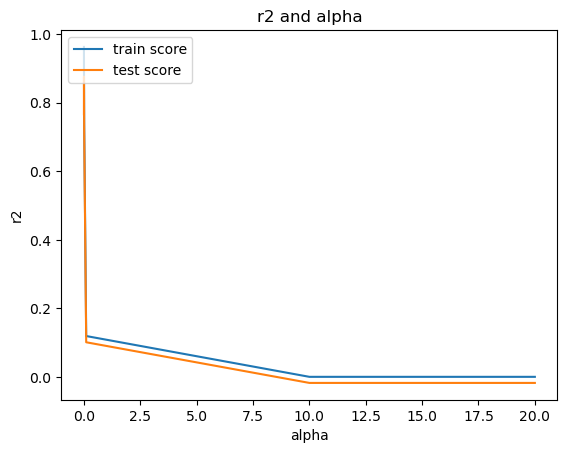

In [46]:
# plotting the mean test and training scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [47]:
print('Optimum Alpha: ', optimum_alpha)
lasso = Lasso(alpha=optimum_alpha['alpha'])
lasso.fit(X_train, y_train)

Optimum Alpha:  {'alpha': 0.001}


Lasso(alpha=0.001)

In [48]:
print('Lasso Train Score', lasso.score(X_train,y_train))
print('Lasso Test Score', lasso.score(X_test,y_test))

Lasso Train Score 0.9105607258295287
Lasso Test Score 0.8278582764252816


In [49]:
model_params_df = pd.DataFrame([])
model_params_df['columns'] = list(df.columns)
model_params_df['coef'] = lasso.coef_

model_params_df = model_params_df.sort_values(by='coef', ascending=False)
print('Lasso Intercept:', lasso.intercept_)
model_params_df.head(10)

Lasso Intercept: 11.197735540131681


,columns,coef
6,1stFlrSF,0.815071
7,2ndFlrSF,0.368526
81,OverallQual_9,0.210389
9,GarageArea,0.179996
3,BsmtFinSF1,0.144872
80,OverallQual_8,0.130739
436,SaleCondition_Partial,0.105167
45,Neighborhood_NridgHt,0.088604
340,CentralAir_Y,0.085429
35,Neighborhood_Crawfor,0.079253


## Conclusion

#### Ridge and Lasso Scores

In [ ]:
> Ridge Scores
  - Optimum Alpha:  {'alpha': 5.0}
  - Ridge Train Score 0.9342008723523131
  - Ridge Test Score 0.8453589166010134
  - Top 5 variables
    - 1stFlrSF	0.300729
    - BsmtFinSF1	0.182437
    - OverallQual_9	0.166400
    - 2ndFlrSF	0.161356
    - OverallQual_8	0.131749
> Lasso Scores
  - Optimum Alpha:  {'alpha': 0.001}
  - Lasso Train Score 0.9105607258295287
  - Lasso Test Score 0.8278582764252816
  - Top 5 variables
    - 1stFlrSF	0.815071
    - 2ndFlrSF	0.368526
    - OverallQual_9	0.210389
    - GarageArea	0.179996
    - BsmtFinSF1	0.144872

# END